# Monte Carlo fit results analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import apollinaire as apn
from apollinaire.peakbagging import *

In [2]:
plt.rcParams['lines.linewidth'] = 2
capsize = 5

In [3]:
def count_values_beyond_sigma (ref_value, cube, param='freq', sigma=1, 
                               mode='strong', symmetric=True) :
    '''
    Count the number of fitted values beyond a given number of sigma. 
    '''
    if mode=='strong' :
        jj=1
    if mode=='weak' :
        jj=0
    if param=='freq' :
        ii = 2
    if param=='height' :
        ii = 5
    if param=='width' :
        ii = 8
    if param=='split' :
        ii = 14
    n = cube.shape[0]
    if symmetric :
        max_sigma = np.amax (cube[:,jj,ii+1:ii+3], axis=1)
        count = np.count_nonzero (np.abs (cube[:,jj,ii]-ref_value) > sigma*max_sigma)
    else :
        sigma_minus = cube[:,jj,ii+1]
        sigma_plus = cube[:,jj,ii+2]    
        aux = cube[:,jj,ii]-ref_value
        cond = (aux<0)&(np.abs (aux)>sigma*sigma_plus) | (aux>0)&(np.abs (aux)>sigma*sigma_minus)
        count = np.count_nonzero (cond)
    print ('{} values beyond {} sigma for the {} mode ({} % within)'.format (count, sigma, mode,
                                                                            (n-count)/n * 100))

In [4]:
profile = 'monte_carlo_3'
ndays = 1460
outDir = profile + '_' + str (ndays) + 'days'

First we need to read again the reference

In [5]:
a2z_file = profile + '.a2z'
a2z = read_a2z (a2z_file)
pkb = sort_pkb (a2z_to_pkb (a2z))

Let's also read the files with the results

In [6]:
list_results = glob.glob (path.join (outDir, '*.pkb'))
x = np.arange (1, len (list_results)+1)
cube = np.zeros ((len (list_results), 2, 20))
for ii, f in enumerate (list_results) :
    result = np.loadtxt (f)
    cube[ii,:,:] = result

## Frequencies

In [7]:
f1, f2 = pkb[0,2], pkb[1,2]

In [8]:
count_values_beyond_sigma (f2, cube, param='freq', sigma=1, mode='strong')
count_values_beyond_sigma (f2, cube, param='freq', sigma=3, mode='strong')
count_values_beyond_sigma (f1, cube, param='freq', sigma=1, mode='weak')
count_values_beyond_sigma (f1, cube, param='freq', sigma=3, mode='weak')

66 values beyond 1 sigma for the strong mode (67.0 % within)
0 values beyond 3 sigma for the strong mode (100.0 % within)
52 values beyond 1 sigma for the weak mode (74.0 % within)
0 values beyond 3 sigma for the weak mode (100.0 % within)


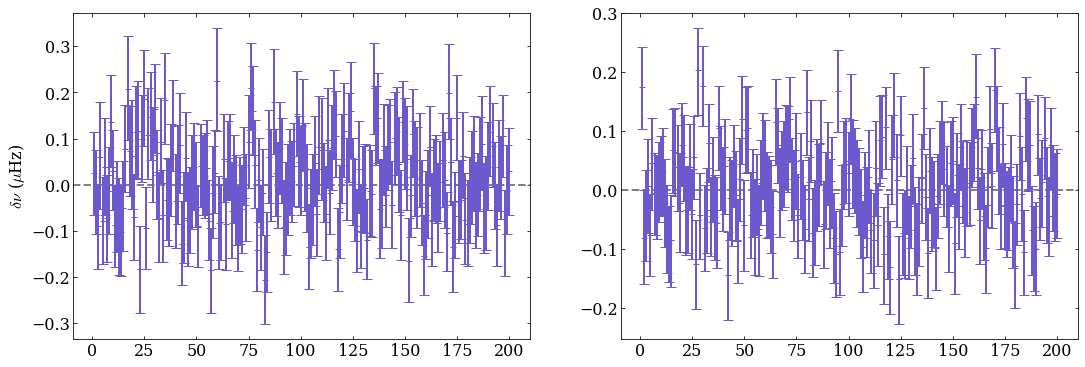

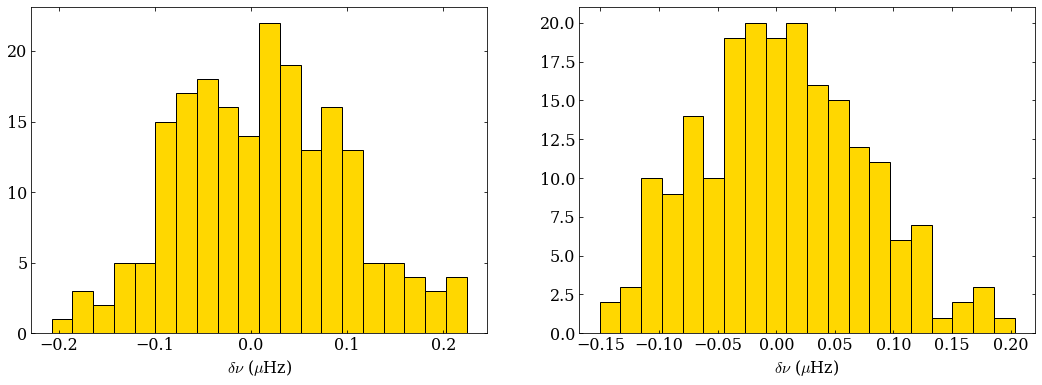

In [9]:
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(18, 6))
ax1.axhline (0, color='grey', ls='--')
ax2.axhline (0, color='grey', ls='--')
ax1.errorbar (x, cube[:,0,2]-f1, yerr=(cube[:,0,3], cube[:,0,4]), capsize=capsize, color='slateblue', fmt='_')
ax2.errorbar (x, cube[:,1,2]-f2, yerr=(cube[:,1,3], cube[:,1,4]), capsize=capsize, color='slateblue', fmt='_')
ax1.set_ylabel (r'$\delta \nu$ ($\mu$Hz)')
plt.savefig ('figures/frequency_error.pdf')

fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(18, 6))
ax1.hist (cube[:,0,2]-f1, bins=20, color='gold', edgecolor='black')
ax2.hist (cube[:,1,2]-f2, bins=20, color='gold', edgecolor='black')
ax1.set_xlabel (r'$\delta \nu$ ($\mu$Hz)')
ax2.set_xlabel (r'$\delta \nu$ ($\mu$Hz)')
plt.savefig ('figures/frequency_hist.pdf')

## Heights

In [10]:
f1, f2 = pkb[0,4], pkb[1,4]

In [11]:
count_values_beyond_sigma (f2, cube, param='height', sigma=1, mode='strong', symmetric=False)
count_values_beyond_sigma (f2, cube, param='height', sigma=3, mode='strong', symmetric=False)
count_values_beyond_sigma (f1, cube, param='height', sigma=1, mode='weak', symmetric=False)
count_values_beyond_sigma (f1, cube, param='height', sigma=3, mode='weak', symmetric=False)

56 values beyond 1 sigma for the strong mode (72.0 % within)
1 values beyond 3 sigma for the strong mode (99.5 % within)
56 values beyond 1 sigma for the weak mode (72.0 % within)
0 values beyond 3 sigma for the weak mode (100.0 % within)


Text(0, 0.5, '$\\delta H$')

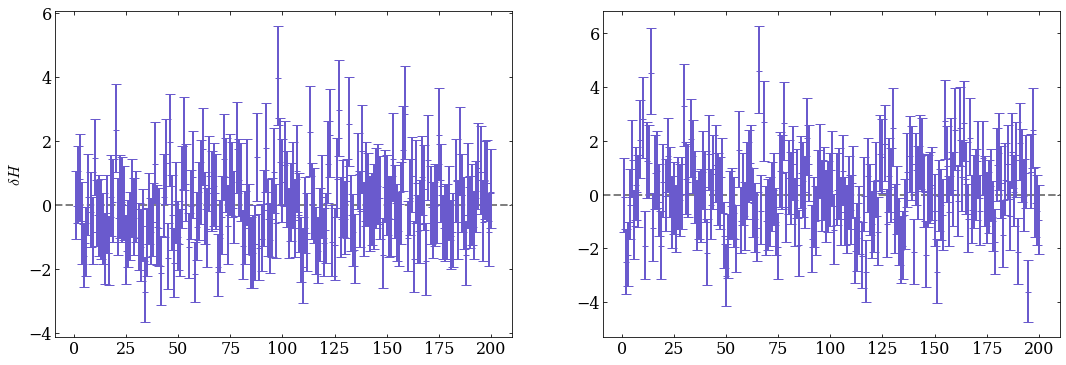

In [12]:
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(18, 6))
ax1.axhline (0, color='grey', ls='--')
ax2.axhline (0, color='grey', ls='--')
ax1.errorbar (x, cube[:,0,5]-f1, yerr=(cube[:,0,6], cube[:,0,7]), capsize=capsize, color='slateblue', fmt='_')
ax2.errorbar (x, cube[:,1,5]-f2, yerr=(cube[:,1,6], cube[:,1,7]), capsize=capsize, color='slateblue', fmt='_')
ax1.set_ylabel ('$\delta H$')

## Widths

In [13]:
f1, f2 = pkb[0,6], pkb[1,6]

In [14]:
count_values_beyond_sigma (f2, cube, param='width', sigma=1, mode='strong', symmetric=False)
count_values_beyond_sigma (f2, cube, param='width', sigma=3, mode='strong', symmetric=False)
count_values_beyond_sigma (f1, cube, param='width', sigma=1, mode='weak', symmetric=False)
count_values_beyond_sigma (f1, cube, param='width', sigma=3, mode='weak', symmetric=False)

60 values beyond 1 sigma for the strong mode (70.0 % within)
1 values beyond 3 sigma for the strong mode (99.5 % within)
47 values beyond 1 sigma for the weak mode (76.5 % within)
1 values beyond 3 sigma for the weak mode (99.5 % within)


Text(0, 0.5, '$\\delta \\Gamma$ ($\\mu$Hz)')

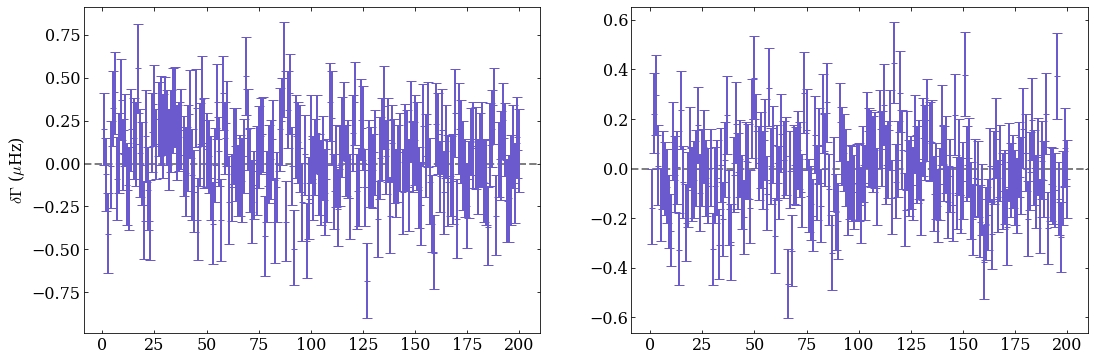

In [15]:
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(18, 6))
ax1.axhline (0, color='grey', ls='--')
ax2.axhline (0, color='grey', ls='--')
ax1.errorbar (x, cube[:,0,8]-f1, yerr=(cube[:,0,9], cube[:,0,10]), capsize=capsize, color='slateblue', fmt='_')
ax2.errorbar (x, cube[:,1,8]-f2, yerr=(cube[:,1,9], cube[:,1,10]), capsize=capsize, color='slateblue', fmt='_')
ax1.set_ylabel ('$\delta \Gamma$ ($\mu$Hz)')

## Splittings

In [16]:
f1, f2 = pkb[0,10], pkb[1,10]

In [17]:
count_values_beyond_sigma (f2, cube, param='split', sigma=1, mode='strong')
count_values_beyond_sigma (f2, cube, param='split', sigma=3, mode='strong')
count_values_beyond_sigma (f1, cube, param='split', sigma=1, mode='weak')
count_values_beyond_sigma (f1, cube, param='split', sigma=3, mode='weak')

0 values beyond 1 sigma for the strong mode (100.0 % within)
0 values beyond 3 sigma for the strong mode (100.0 % within)
45 values beyond 1 sigma for the weak mode (77.5 % within)
0 values beyond 3 sigma for the weak mode (100.0 % within)


Text(0.5, 0, '$\\delta s$ ($\\mu$Hz)')

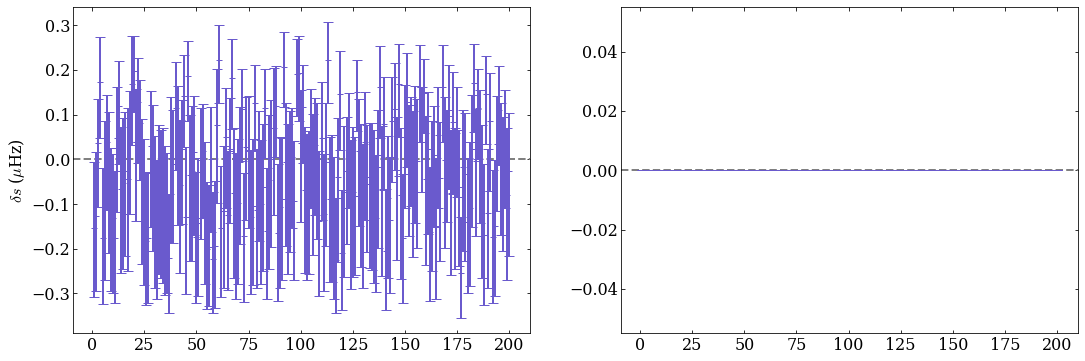

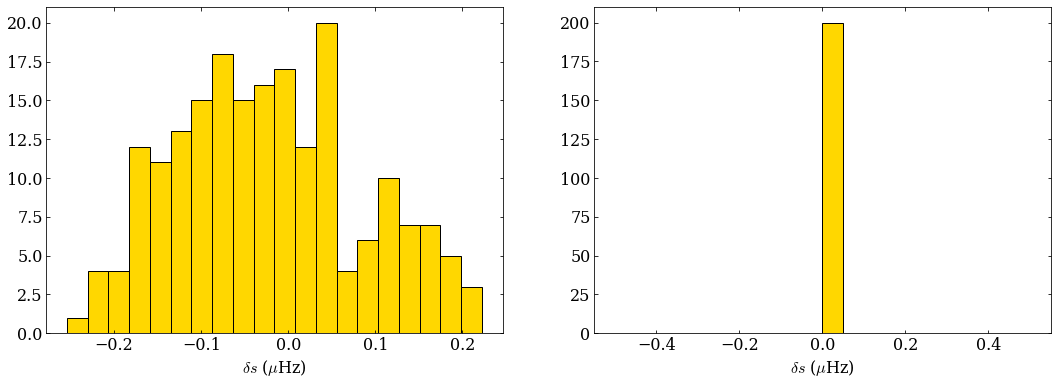

In [18]:
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(18, 6))
ax1.axhline (0, color='grey', ls='--')
ax2.axhline (0, color='grey', ls='--')
ax1.errorbar (x, cube[:,0,14]-f1, yerr=(cube[:,0,15], cube[:,0,16]), capsize=capsize, color='slateblue', fmt='_')
ax2.errorbar (x, cube[:,1,14]-f2, yerr=(cube[:,1,15], cube[:,1,16]), capsize=capsize, color='slateblue', fmt='_')
ax1.set_ylabel ('$\delta s$ ($\mu$Hz)')

fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(18, 6))
ax1.hist (cube[:,0,14]-f1, bins=20, color='gold', edgecolor='black')
ax2.hist (cube[:,1,14]-f2, bins=20, color='gold', edgecolor='black')
ax1.set_xlabel (r'$\delta s$ ($\mu$Hz)')
ax2.set_xlabel (r'$\delta s$ ($\mu$Hz)')